# descriptive analysis

In [ ]:
# check comments
# dataset: movies_cast_2

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import requests
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
movies = pd.read_csv("/content/drive/MyDrive/Final_Project_CSS/Datasets/New processed data/movies_cast_2.csv")

In [ ]:
movies.head()

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,nconst
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"['nm2209370', 'nm2913790', 'nm2104166', 'nm291..."
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225..."
2,8453,tt0876294,movie,Zombie Diaries,The Zombie Diaries,0,2006,NaN,85,"Horror,Sci-Fi",25035,en,9300,2000000,0.004650,215.053763,4.0,4755,NaN,"['nm0014714', 'nm2428131', 'nm2408572', 'nm028..."
3,9342,tt0907657,movie,Once,Once,0,2007,NaN,86,"Drama,Music,Romance",5723,en,160000,20710513,0.007726,129.440706,7.8,116662,NaN,"['nm0360598', 'nm2461627', 'nm2008013', 'nm247..."
4,2405,tt0374900,movie,Napoleon Dynamite,Napoleon Dynamite,0,2004,NaN,96,Comedy,8193,en,400000,46118097,0.008673,115.295243,6.9,218880,NaN,"['nm1417647', 'nm0708293', 'nm0340973', 'nm108..."


In [ ]:
# principal cast analysis

In [ ]:
principal = movies[['tconst', 'nconst']]
principal

,tconst,nconst
0,tt1179904,"['nm2209370', 'nm2913790', 'nm2104166', 'nm291..."
1,tt2309260,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225..."
2,tt0876294,"['nm0014714', 'nm2428131', 'nm2408572', 'nm028..."
3,tt0907657,"['nm0360598', 'nm2461627', 'nm2008013', 'nm247..."
4,tt0374900,"['nm1417647', 'nm0708293', 'nm0340973', 'nm108..."
...,...,...
3535,tt1935194,"['nm2207222', 'nm7188414', 'nm1869101', 'nm471..."
3536,tt1376213,"['nm2902567', 'nm0790688', 'nm0372176', 'nm000..."
3537,tt7869070,"['nm0000237', 'nm0001701', 'nm3132111', 'nm362..."
3538,tt0254703,"['nm0000483', 'nm0289098', 'nm0716490', 'nm053..."


In [ ]:
# principal.nconst.str.len()
principal.nconst.map(len)

0       52
1       52
2       52
3       52
4       52
        ..
3535    52
3536    52
3537    52
3538    52
3539    52
Name: nconst, Length: 3540, dtype: int64

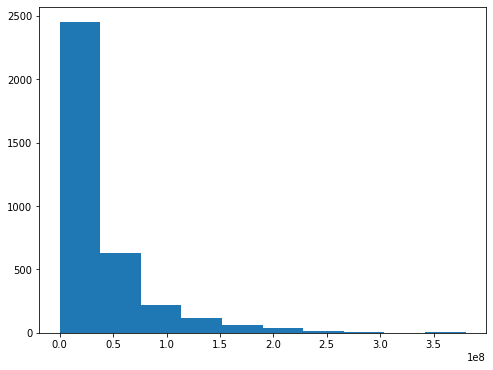

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(movies['budget'])
plt.show()

In [ ]:
highest_revenue = movies[movies.revenue == max(movies["revenue"])]
highest_revenue

# highest_budget = movies[movies.revenue == max(movies["budget"])]
# lowest_revenue = movies[movies.revenue == min(movies["revenue"])]
# lowest_budget = movies[movies.revenue == min(movies["budget"])]

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,nconst
128,3999,tt0499549,movie,Avatar,Avatar,0,2009,NaN,162,"Action,Adventure,Fantasy",19995,en,237000000,2920357254,0.081154,12.322183,7.8,1221488,NaN,"['nm0941777', 'nm0757855', 'nm0000244', 'nm073..."


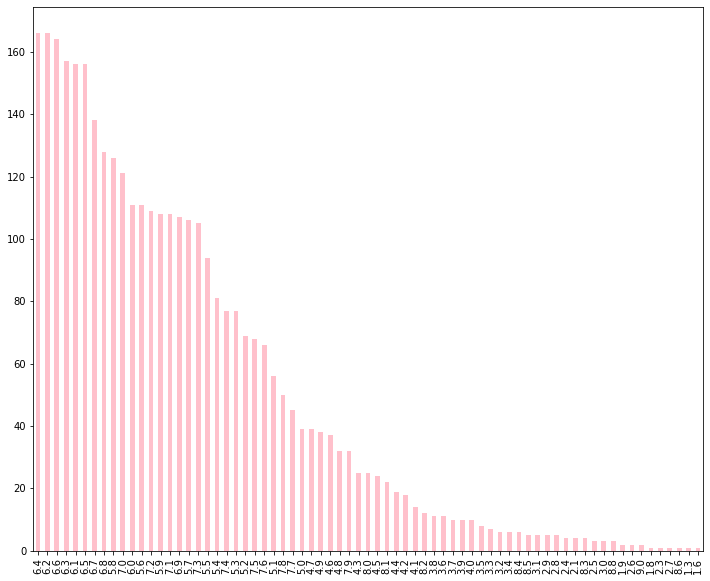

In [ ]:
# average ratings plot
plt.figure(figsize=(12, 10))
movies['averageRating'].value_counts().plot(kind='bar', color = 'pink', linewidth=0.01)

In [ ]:
# correlation between budget and average rating

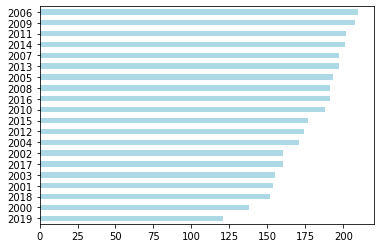

In [ ]:
# distribution of movies by year

sorted_movies = movies['startYear'].value_counts().sort_values(ascending=True)
sorted_movies.plot(kind='barh', color = 'lightblue', linewidth=0.001)

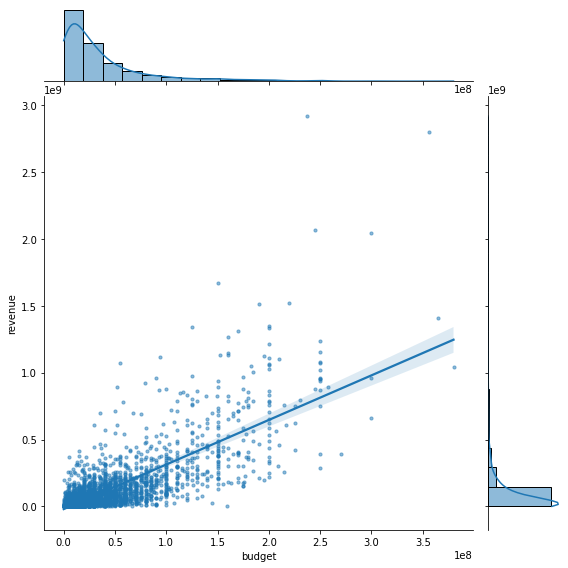

slope=3.3330275298312997, intercept=-20185381.603132546, r_value=0.7681036618761018, p_value=0.0, std_err=0.04671334405620234


In [ ]:
# correlation between budget and revenue

f = sns.jointplot(data=movies, x='budget', y='revenue', kind='reg',
                  height=8, marginal_kws=dict(bins=20),
                  joint_kws={'scatter_kws':dict(alpha=0.5, s=10)})

slope, intercept, r_value, p_value, std_err = stats.linregress(movies['budget'], movies['revenue'])
plt.show()
print(f'slope={slope}, intercept={intercept}, r_value={r_value}, p_value={p_value}, std_err={std_err}')

In [ ]:
# regression analysis for budget-revenue

train = movies[['startYear', 'runtimeMinutes', 'budget', 'revenue', 'averageRating']]
train

,startYear,runtimeMinutes,budget,revenue,averageRating
0,2007,86,230000,194183034,6.3
1,2015,81,100000,42664410,4.2
2,2006,85,9300,2000000,4.0
3,2007,86,160000,20710513,7.8
4,2004,96,400000,46118097,6.9
...,...,...,...,...,...
3535,2017,93,28210303,7793,5.3
3536,2013,100,25000000,6399,5.4
3537,2019,88,18000000,3153,4.2
3538,2001,100,6100000,714,4.3


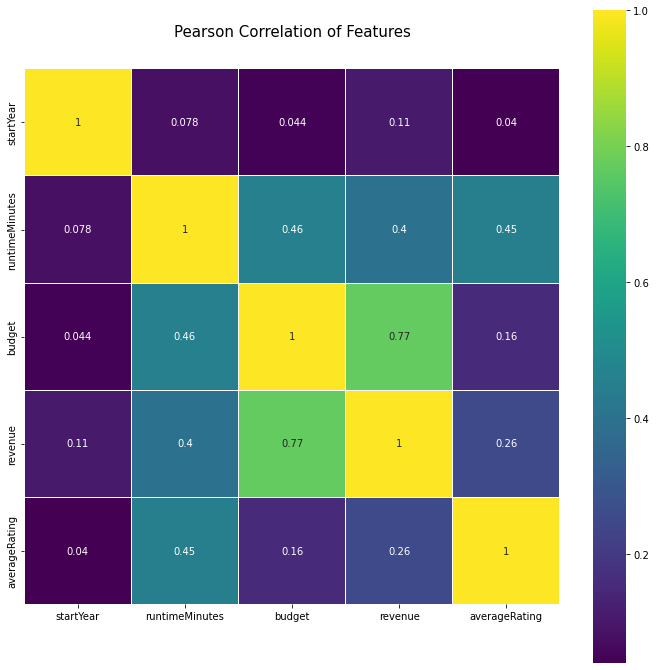

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.iloc[:,[0, 1, 2, 3, -1]].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
# budget for action movies
genres_df = movies[['tconst', 'genres']]
g2 = genres_df.genres.unique().tolist()
new_g = []

for i in range(len(g2)):
  g = g2[i].split()
  if g not in new_g:
    new_g.append(g)

# movies.loc[movies['genres'].isin('action')]

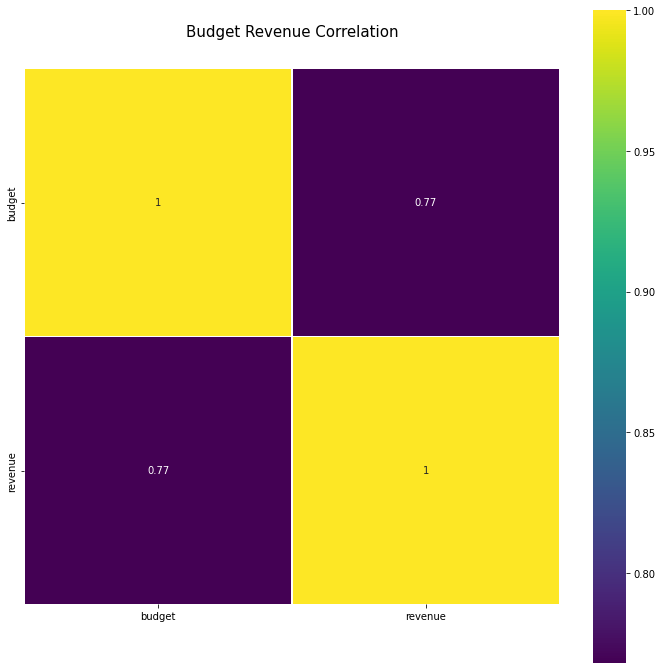

In [ ]:
# budget revenue correlation matrix

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Budget Revenue Correlation', y=1.05, size=15)
sns.heatmap(
    train.loc[:, train.columns.str.contains('budget') | train.columns.str.contains('revenue')].corr(),
    linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
# budget change through years for different genres

# NOTE: add an extra column that picks only the first genre listed for each movie
import random

movies['random_genre'] = pd.Series(random.choices(['Action', 'Drama', 'Horror', 'Comedy'], weights=[4, 3, 1, 2], k=len(movies)), index=movies.index)

In [ ]:
genres = ['Action', 'Drama', 'Horror', 'Comedy']
revenues = movies[movies['random_genre'].isin(genres)]
revenues.head()


,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,...,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,nconst,random_genre
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",...,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"['nm2209370', 'nm2913790', 'nm2104166', 'nm291...",Action
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",...,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225...",Drama
2,8453,tt0876294,movie,Zombie Diaries,The Zombie Diaries,0,2006,NaN,85,"Horror,Sci-Fi",...,en,9300,2000000,0.004650,215.053763,4.0,4755,NaN,"['nm0014714', 'nm2428131', 'nm2408572', 'nm028...",Drama
3,9342,tt0907657,movie,Once,Once,0,2007,NaN,86,"Drama,Music,Romance",...,en,160000,20710513,0.007726,129.440706,7.8,116662,NaN,"['nm0360598', 'nm2461627', 'nm2008013', 'nm247...",Drama
4,2405,tt0374900,movie,Napoleon Dynamite,Napoleon Dynamite,0,2004,NaN,96,Comedy,...,en,400000,46118097,0.008673,115.295243,6.9,218880,NaN,"['nm1417647', 'nm0708293', 'nm0340973', 'nm108...",Drama


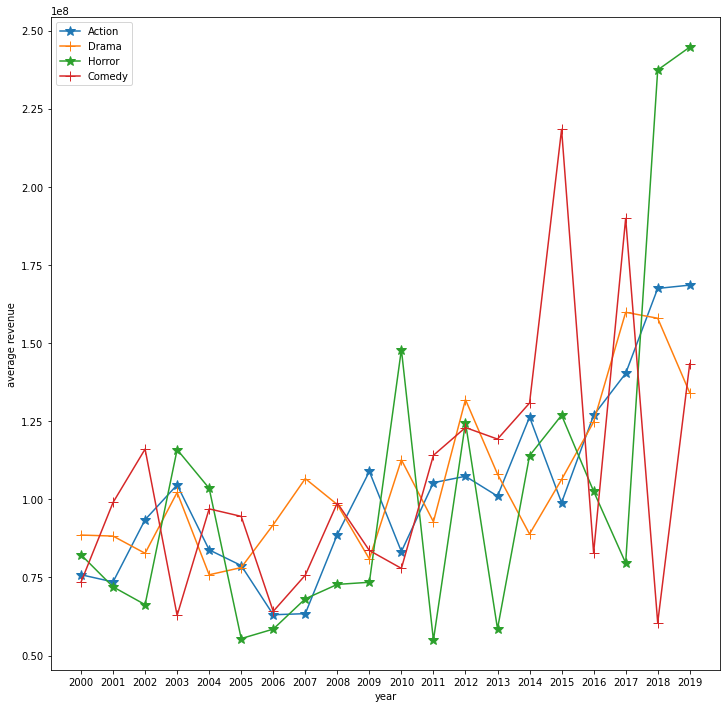

In [ ]:
plt.figure(figsize=(12,12))

avg_Revenue = movies.groupby(['random_genre', 'startYear']).mean().reset_index().pivot(index='startYear', columns='random_genre',values='revenue')

marker = {'Action':'-*', 'Drama':'-+', 'Horror':'*-', 'Comedy':'+-'}

for i in genres:
  plt.plot(avg_Revenue.index, avg_Revenue[i], marker[i], label = i, markersize = 10)


plt.xticks(avg_Revenue.index)
plt.xlabel('year')
plt.ylabel('average revenue')
plt.legend()
plt.show()

In [ ]:
# change in number of actors vs actresses through years for different genres

In [ ]:
people = pd.read_csv("/content/drive/MyDrive/Final_Project_CSS/Datasets/New processed data/principals.csv")
people.head()

,tconst,ordering,nconst,category,job,characters
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]"
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]"
4,tt0118589,1,nm0001014,actress,\N,"[""Billie Frank""]"


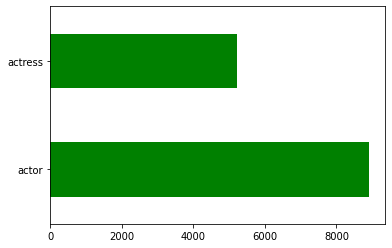

In [ ]:
people['category'].value_counts().plot(kind='barh', color = 'green', linewidth=0.01)

In [ ]:
# the ratio of males and females in each movie

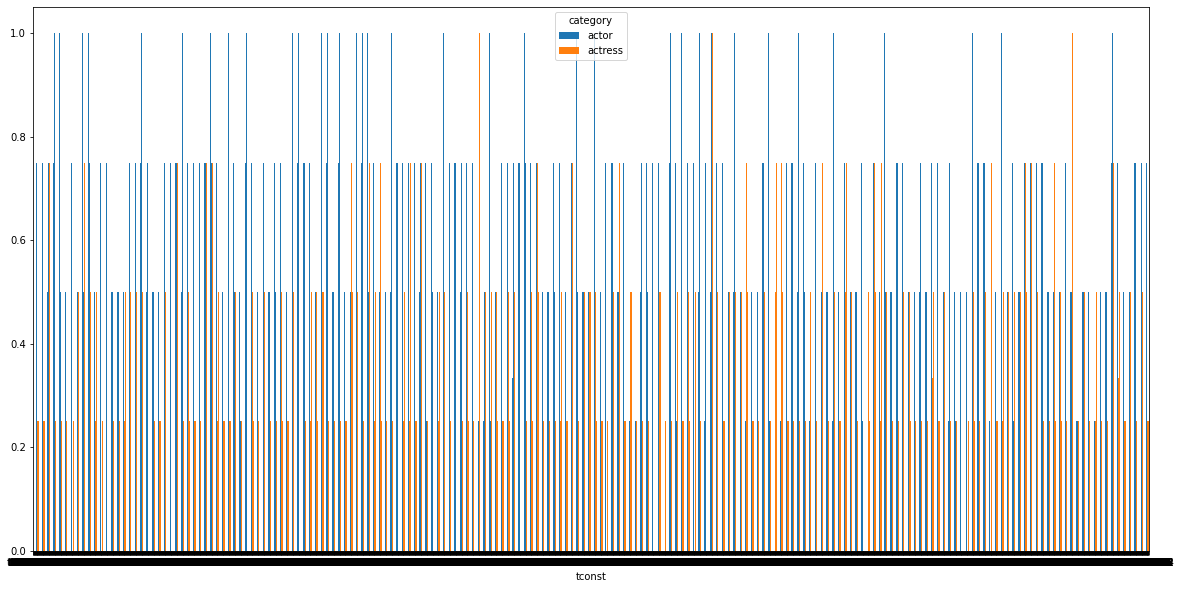

In [ ]:
crosstb = pd.crosstab(people['tconst'], people['category'], normalize='index')
crosstb.plot(kind="bar", stacked=False, rot=0, figsize=(22, 10))


In [ ]:
genders = ['actor', 'actress']
gender_dist = people[people['category'].isin(genders)]
gender_dist.head()

# ADD REVENUE AND YEAR TO THIS DATASET

,tconst,ordering,nconst,category,job,characters
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]"
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]"
4,tt0118589,1,nm0001014,actress,\N,"[""Billie Frank""]"


In [ ]:
plt.figure(figsize=(12,12))

avg_Revenue = movies.groupby(['category', 'startYear']).mean().reset_index().pivot(index='startYear', columns='category',values='revenue')

marker = {'actress':'-*-', 'actor':'--'}

for i in genders:
  plt.plot(avg_Revenue.index, avg_Revenue[i], marker[i], label = i, markersize = 10)


plt.xticks(avg_Revenue.index)
plt.xlabel('year')
plt.ylabel('average revenue')
plt.legend()
plt.show()

KeyError: ignored

<Figure size 864x864 with 0 Axes>

# %%%%%%%%%% descriptive analysis end %%%%%%%%%%%

In [ ]:
principals_filepath = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/title_principals.tsv'
movies_filepath = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/Movie details/filtered_movies.csv'
cast_filepath = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/Movie details/movies_cast.csv'
names_filepath = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/name_basics.csv'
title_basic_filepath = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/title_basic_data.csv'

In [ ]:
p_big = pd.read_csv(principals_filepath, delimiter='\t')

In [ ]:
print(p_big.shape)
p_big.head()

(52116168, 6)


,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [ ]:
movies = pd.read_csv(movies_filepath)
print(movies.shape)
movies.head()

(3587, 19)


,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k
1,4135,tt0390521,movie,Super Size Me,Super Size Me,0,2004,NaN,100,Documentary,9372,en,65000,28575078,0.002275,439.616585,7.2,108792,NaN
2,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN
3,8453,tt0876294,movie,Zombie Diaries,The Zombie Diaries,0,2006,NaN,85,"Horror,Sci-Fi",25035,en,9300,2000000,0.004650,215.053763,4.0,4755,NaN
4,9342,tt0907657,movie,Once,Once,0,2007,NaN,86,"Drama,Music,Romance",5723,en,160000,20710513,0.007726,129.440706,7.8,116662,NaN


In [ ]:
# correlation between budget and revenue, correlation between budget and average rating

In [ ]:
# budget and genre graph

In [ ]:
movie_ids = movies.tconst.to_list()

In [ ]:
p_movies = list(p_big.tconst.unique())
len(p_movies)

8309693

In [ ]:
# overlap = [i for i in movie_ids if i in p_movies]
overlap = list(set(movie_ids) & set(p_movies))
len(overlap), len(movie_ids)

(3585, 3587)

In [ ]:
[i for i in movie_ids if i not in overlap]
# ['tt1233334', 'tt0273517']

['tt1233334', 'tt0273517']

In [ ]:
principals = p_big[p_big.tconst.isin(movie_ids)]
print(principals.shape)
principals = principals[principals.category.isin(['actor', 'actress'])]
print(principals.shape)

(35665, 6)
(14122, 6)


In [ ]:
principals.to_csv('principals.csv', index=False)

In [ ]:
principals.tconst.unique().shape

(3540,)

In [ ]:
people_list = pd.DataFrame(principals.groupby('tconst')['nconst'].apply(list)).reset_index()
print(people_list.shape)
people_list.head()

(3540, 2)


,tconst,nconst
0,tt0035423,"[nm0000212, nm0413168, nm0000630, nm0005227]"
1,tt0118589,"[nm0001014, nm0073160, nm0066586, nm0004771]"
2,tt0120467,"[nm0641168, nm0424682, nm0507915, nm0839486]"
3,tt0120667,"[nm0344435, nm0004821, nm0262635, nm0004695]"
4,tt0120679,"[nm0000161, nm0000547, nm0001691, nm0535502]"


In [ ]:
missing_cast = [i for i in movie_ids if i not in people_list.tconst.to_list()]
print(len(missing_cast))
movies[movies.tconst.isin(missing_cast)].shape

47


(47, 19)

In [ ]:
movies = movies[~movies.tconst.isin(missing_cast)]
print(movies.shape)
movies.head()

(3540, 19)


,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k
2,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN
3,8453,tt0876294,movie,Zombie Diaries,The Zombie Diaries,0,2006,NaN,85,"Horror,Sci-Fi",25035,en,9300,2000000,0.004650,215.053763,4.0,4755,NaN
4,9342,tt0907657,movie,Once,Once,0,2007,NaN,86,"Drama,Music,Romance",5723,en,160000,20710513,0.007726,129.440706,7.8,116662,NaN
5,2405,tt0374900,movie,Napoleon Dynamite,Napoleon Dynamite,0,2004,NaN,96,Comedy,8193,en,400000,46118097,0.008673,115.295243,6.9,218880,NaN


In [ ]:
# data viz  for genre, budget, revenue, rio/ratio, rating, numVotes

In [ ]:
movies_cast_2 = pd.merge(movies, people_list, left_on='tconst', right_on='tconst', how='left')
movies_cast_2

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,nconst
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"[nm2209370, nm2913790, nm2104166, nm2910808]"
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"[nm3790547, nm6018502, nm4090362, nm2258992]"
2,8453,tt0876294,movie,Zombie Diaries,The Zombie Diaries,0,2006,NaN,85,"Horror,Sci-Fi",25035,en,9300,2000000,0.004650,215.053763,4.0,4755,NaN,"[nm0014714, nm2428131, nm2408572, nm0286170]"
3,9342,tt0907657,movie,Once,Once,0,2007,NaN,86,"Drama,Music,Romance",5723,en,160000,20710513,0.007726,129.440706,7.8,116662,NaN,"[nm0360598, nm2461627, nm2008013, nm2478608]"
4,2405,tt0374900,movie,Napoleon Dynamite,Napoleon Dynamite,0,2004,NaN,96,Comedy,8193,en,400000,46118097,0.008673,115.295243,6.9,218880,NaN,"[nm1417647, nm0708293, nm0340973, nm1088052]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,10702,tt1935194,movie,Overdrive,Overdrive,0,2017,NaN,93,"Action,Adventure,Crime",404733,en,28210303,7793,3619.954190,0.000276,5.3,14982,NaN,"[nm2207222, nm7188414, nm1869101, nm4719349]"
3536,414,tt1376213,movie,The Adventurer: The Curse of the Midas Box,The Adventurer: The Curse of the Midas Box,0,2013,NaN,100,"Adventure,Family,Fantasy",227707,en,25000000,6399,3906.860447,0.000256,5.4,6779,NaN,"[nm2902567, nm0790688, nm0372176, nm0000554]"
3537,9979,tt7869070,movie,The Fanatic,The Fanatic,0,2019,NaN,88,"Crime,Thriller",509853,en,18000000,3153,5708.848716,0.000175,4.2,11981,NaN,"[nm0000237, nm0001701, nm3132111, nm3626674]"
3538,3185,tt0254703,movie,The Point Men,The Point Men,0,2001,NaN,100,"Action,Drama",46943,en,6100000,714,8543.417367,0.000117,4.3,1161,NaN,"[nm0000483, nm0289098, nm0716490, nm0531229]"


In [ ]:
movies_cast = pd.read_csv(cast_filepath)
print(movies_cast.shape)
movies_cast.head()

(3540, 13)


,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,budget,revenue,ratio,ROI,averageRating,numVotes,nconst
0,tt1179904,Paranormal Activity,Paranormal Activity,2007,86,"Horror,Mystery",230000,194183034,0.001184,844.274061,6.3,238846,"['nm2209370', 'nm2913790', 'nm2104166', 'nm291..."
1,tt2309260,The Gallows,The Gallows,2015,81,"Horror,Mystery,Thriller",100000,42664410,0.002344,426.644100,4.2,20611,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225..."
2,tt0876294,Zombie Diaries,The Zombie Diaries,2006,85,"Horror,Sci-Fi",9300,2000000,0.004650,215.053763,4.0,4755,"['nm0014714', 'nm2428131', 'nm2408572', 'nm028..."
3,tt0907657,Once,Once,2007,86,"Drama,Music,Romance",160000,20710513,0.007726,129.440706,7.8,116662,"['nm0360598', 'nm2461627', 'nm2008013', 'nm247..."
4,tt0374900,Napoleon Dynamite,Napoleon Dynamite,2004,96,Comedy,400000,46118097,0.008673,115.295243,6.9,218880,"['nm1417647', 'nm0708293', 'nm0340973', 'nm108..."


In [ ]:
# average number of principal cast per movie

In [ ]:
# mc_2_len = [len(n) for n in movies_cast_2.nconst.to_list()]
movies_cast_2.apply(lambda x: len(x.nconst), axis=1).describe()

count    3540.000000
mean        3.989266
std         0.298623
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max        10.000000
dtype: float64

In [ ]:
people_list.to_csv('people_list.csv', index=False)

In [ ]:
!ls

drive  people_list.csv	sample_data


In [ ]:
movies_cast_2.to_csv('movies_cast_2.csv', index=False)

In [ ]:
movies_cast.shape, movies_cast_2.shape

((3540, 13), (3540, 20))

In [ ]:
casts = list(principals.nconst.unique())
len(casts)

5273

In [ ]:
names = pd.read_csv(names_filepath)

In [ ]:
names[names.primaryName == 'Jon Daly']

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
2248795,nm11394247,Jon Daly,\N,\N,actor,tt11610790
2251062,nm11396607,Jon Daly,\N,\N,actor,tt8430922
2475533,nm11628675,Jon Daly,\N,\N,NaN,tt12433716
2760829,nm1192477,Jon Daly,\N,\N,"cinematographer,camera_department,producer","tt0373732,tt0887240,tt0322225,tt0472946"
3787924,nm13006278,Jon Daly,\N,\N,actor,"tt8694374,tt10768410"
7242840,nm4207966,Jon Daly,\N,\N,sound_department,tt0819647
8441205,nm5575843,Jon Daly,\N,\N,NaN,tt0375059
9227075,nm6592818,Jon Daly,\N,\N,actor,tt2380303
10964645,nm8823625,Jon Daly,\N,\N,NaN,tt1849622


In [ ]:
print(names.shape)
names.head()

(11931746, 6)


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0031983,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0071877,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0057345,tt0049189,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0078723,tt0072562,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0060827,tt0050976,tt0050986"


In [ ]:
names_rel = names[names.nconst.isin(casts)]
print(names_rel.shape)
names_rel.head()

(5272, 6)


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0071877,tt0117057"
7,nm0000008,Marlon Brando,1924,2004,"actor,soundtrack,director","tt0070849,tt0078788,tt0068646,tt0047296"
83,nm0000084,Gong Li,1965,\N,"actress,producer","tt0473444,tt0430357,tt0397535,tt0101640"
89,nm0000090,Armin Mueller-Stahl,1930,\N,"actor,director,writer","tt0117631,tt0765443,tt0963178,tt0139809"
91,nm0000092,John Cleese,1939,\N,"actor,writer,producer","tt0071853,tt0063929,tt0085959,tt0095159"


In [ ]:
# movies_cast_2.nconst.to_list()
all_cast = [j for sub in movies_cast_2.nconst.to_list() for j in sub]
len(all_cast)

14122

In [ ]:
all_un_cast = list(set(all_cast))
len(all_un_cast)

5273

In [ ]:
[i for i in casts if i not in names_rel.nconst.to_list()]

['nm1789985']

In [ ]:
[i for i in all_un_cast if i not in names_rel.nconst.to_list()]

['nm1789985']

In [ ]:
names[names.nconst == 'nm1789985']

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles


In [ ]:
movies_cast_2.head()

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,nconst
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"[nm2209370, nm2913790, nm2104166, nm2910808]"
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"[nm3790547, nm6018502, nm4090362, nm2258992]"
2,8453,tt0876294,movie,Zombie Diaries,The Zombie Diaries,0,2006,NaN,85,"Horror,Sci-Fi",25035,en,9300,2000000,0.004650,215.053763,4.0,4755,NaN,"[nm0014714, nm2428131, nm2408572, nm0286170]"
3,9342,tt0907657,movie,Once,Once,0,2007,NaN,86,"Drama,Music,Romance",5723,en,160000,20710513,0.007726,129.440706,7.8,116662,NaN,"[nm0360598, nm2461627, nm2008013, nm2478608]"
4,2405,tt0374900,movie,Napoleon Dynamite,Napoleon Dynamite,0,2004,NaN,96,Comedy,8193,en,400000,46118097,0.008673,115.295243,6.9,218880,NaN,"[nm1417647, nm0708293, nm0340973, nm1088052]"


In [ ]:
names_rel.to_csv('relevant_names.csv', index=False)

In [ ]:
cast_ids = names_rel.nconst.to_list()
print(len(cast_ids))
cast_ids[:5]

5272


['nm0000002', 'nm0000008', 'nm0000084', 'nm0000090', 'nm0000092']

In [ ]:
prev_roles = p_big[p_big.nconst.isin(cast_ids)]
print(prev_roles.shape)
prev_roles.head()

(769942, 6)


,tconst,ordering,nconst,category,job,characters
282506,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
282507,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"
282508,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]"
282509,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]"
285190,tt0035726,3,nm0060931,actress,\N,"[""Mary Watson""]"


In [ ]:
prev_roles.category.value_counts()

actor                  296944
self                   272802
actress                159281
archive_footage         18759
writer                  10747
director                 7491
producer                 2913
cinematographer           367
composer                  280
archive_sound             191
editor                    151
production_designer        16
Name: category, dtype: int64

In [ ]:
prev_roles.to_csv('prev_roles.csv', index=False)

In [ ]:
# After session crashed
prev_roles = pd.read_csv('./prev_roles.csv')
print(prev_roles.shape)
prev_roles.head()

(769942, 6)


,tconst,ordering,nconst,category,job,characters
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]"
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]"
4,tt0035726,3,nm0060931,actress,\N,"[""Mary Watson""]"


In [ ]:
prev_roles.tconst.unique().shape

(511566,)

In [ ]:
title_basic = pd.read_csv(title_basic_filepath)
print(title_basic.shape)
title_basic.head()

(9233338, 9)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1.0,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5.0,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,NaN,4.0,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,12.0,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1.0,"Comedy,Short"


Need to filter the rows from prev_roles to keep only movie rows. After that also need to filter by number of votes.

In [ ]:
title_type_lookup = dict(zip(title_basic.tconst, title_basic.titleType))

In [ ]:
def title_lookup(tconst):
  try:
    return title_type_lookup[tconst]
  except:
    return None

print(title_lookup('tt0000001'))
print(title_lookup('tt0086748'))

short
None


In [ ]:
prev_roles['titleType'] = prev_roles.apply(lambda x: title_lookup(x.tconst), axis=1)
prev_roles.head()

,tconst,ordering,nconst,category,job,characters,titleType
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]",movie
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]",movie
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]",movie
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]",movie
4,tt0035726,3,nm0060931,actress,\N,"[""Mary Watson""]",movie


In [ ]:
prev_movie_roles = prev_roles[prev_roles.titleType == 'movie']
print(prev_movie_roles.shape)
prev_movie_roles.head()

(80787, 7)


,tconst,ordering,nconst,category,job,characters,titleType
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]",movie
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]",movie
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]",movie
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]",movie
4,tt0035726,3,nm0060931,actress,\N,"[""Mary Watson""]",movie


In [ ]:
prev_movie_roles.to_csv('prev_movie_roles.csv', index=False)

In [ ]:
prev_movie_roles.category.value_counts()

actor                  48977
actress                23984
self                    3440
producer                1617
director                1434
writer                   801
archive_footage          412
composer                  56
cinematographer           46
editor                    18
production_designer        2
Name: category, dtype: int64

In [ ]:
relevant_names = pd.read_csv('./relevant_names.csv')
print(relevant_names.shape)
relevant_names.head()

(5272, 6)


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0071877,tt0117057"
1,nm0000008,Marlon Brando,1924,2004,"actor,soundtrack,director","tt0070849,tt0078788,tt0068646,tt0047296"
2,nm0000084,Gong Li,1965,\N,"actress,producer","tt0473444,tt0430357,tt0397535,tt0101640"
3,nm0000090,Armin Mueller-Stahl,1930,\N,"actor,director,writer","tt0117631,tt0765443,tt0963178,tt0139809"
4,nm0000092,John Cleese,1939,\N,"actor,writer,producer","tt0071853,tt0063929,tt0085959,tt0095159"


In [ ]:
principals = pd.read_csv('principals.csv')
print(principals.shape)
principals.head()

(14122, 6)


,tconst,ordering,nconst,category,job,characters
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]"
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]"
4,tt0118589,1,nm0001014,actress,\N,"[""Billie Frank""]"


In [ ]:
year_lookup_dict = dict(zip(title_basic.tconst, title_basic.startYear))

def lookup_year(tconst):
  try:
    return year_lookup_dict[tconst]
  except:
    return None

print(lookup_year('tt0000001'))
print(lookup_year('tt0086748'))

1894.0
None


In [ ]:
prev_movie_roles['startYear'] = prev_movie_roles.apply(lambda x: lookup_year(x.tconst), axis=1)
prev_movie_roles.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tconst,ordering,nconst,category,job,characters,titleType,startYear
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]",movie,2001.0
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]",movie,2001.0
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]",movie,2001.0
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]",movie,2001.0
4,tt0035726,3,nm0060931,actress,\N,"[""Mary Watson""]",movie,1943.0


Filter previous movies by ratings first.

In [ ]:
ratings_filepath = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/title_ratings_data.csv'
ratings = pd.read_csv(ratings_filepath)
print(ratings.shape)
ratings.head()

(1260951, 3)


,tconst,averageRating,numVotes
0,tt0000001,5.7,1911
1,tt0000002,5.8,256
2,tt0000003,6.5,1714
3,tt0000004,5.6,169
4,tt0000005,6.2,2529


In [ ]:
ratings_dict = ratings.set_index('tconst').to_dict(orient='index')

In [ ]:
def lookup_rating(tconst):
  try:
    return ratings_dict[tconst]['averageRating']
  except:
    return None

def lookup_votes(tconst):
  try:
    return ratings_dict[tconst]['numVotes']
  except:
    return None

print(lookup_rating('tt0162222'))
print(lookup_votes('tt0162222'))

7.8
586450


In [ ]:
prev_movie_roles['averageRatings'] = prev_movie_roles.apply(lambda x: lookup_rating(x.tconst), axis=1)
prev_movie_roles['numVotes'] = prev_movie_roles.apply(lambda x: lookup_votes(x.tconst), axis=1)
prev_movie_roles.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tconst,ordering,nconst,category,job,characters,titleType,startYear,averageRatings,numVotes
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]",movie,2001.0,6.4,84717.0
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]",movie,2001.0,6.4,84717.0
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]",movie,2001.0,6.4,84717.0
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]",movie,2001.0,6.4,84717.0
4,tt0035726,3,nm0060931,actress,\N,"[""Mary Watson""]",movie,1943.0,6.1,271.0


In [ ]:
prev_significant_roles = prev_movie_roles[prev_movie_roles.numVotes > 125]
print(prev_significant_roles.shape)
prev_significant_roles.head()

(58974, 10)


,tconst,ordering,nconst,category,job,characters,titleType,startYear,averageRatings,numVotes
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]",movie,2001.0,6.4,84717.0
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]",movie,2001.0,6.4,84717.0
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]",movie,2001.0,6.4,84717.0
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]",movie,2001.0,6.4,84717.0
4,tt0035726,3,nm0060931,actress,\N,"[""Mary Watson""]",movie,1943.0,6.1,271.0


In [ ]:
prev_significant_roles.to_csv('prev_significant_roles.csv', index=False)

In [ ]:
def get_cast_movies_before_year(nconst, year):
  query = prev_significant_roles[(prev_significant_roles.nconst == nconst) & (prev_significant_roles.startYear < year)]
  return query.tconst.to_list(), query.averageRatings.to_list(), query.numVotes.to_list()

In [ ]:
t_hanks = 'nm0000158'
ca_year = 2000 # Cast Away
# get_cast_movies_before_year(t_hanks, ca_year)

In [ ]:
# prev_significant_roles['prior_movies'] = prev_significant_roles.apply(lambda x: get_cast_movies_before_year(x.nconst, x.startYear), axis=1)
# prev_significant_roles.head()

In [ ]:
prev_tconst = []
prev_ratings = []
prev_numvotes = []
for i, row in prev_significant_roles.iterrows():
  nconst, year = row.nconst, row.startYear
  tconst_list, ratings_list, numvotes_list = get_cast_movies_before_year(nconst, year)
  prev_tconst.append(tconst_list)
  prev_ratings.append(ratings_list)
  prev_numvotes.append(numvotes_list)

In [ ]:
prev_significant_roles['prev_movies'] = prev_tconst
prev_significant_roles['prev_movies_ratings'] = prev_ratings
prev_significant_roles['prev_movies_numvotes'] = prev_numvotes
prev_significant_roles.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,tconst,ordering,nconst,category,job,characters,titleType,startYear,averageRatings,numVotes,prev_movies,prev_movies_ratings,prev_movies_numvotes
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]",movie,2001.0,6.4,84717.0,"[tt0090660, tt0093260, tt0094933, tt0095897, t...","[5.7, 6.8, 6.1, 5.9, 5.7, 7.7, 5.9, 7.2, 5.6, ...","[11804.0, 60197.0, 10395.0, 18751.0, 1367.0, 2..."
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]",movie,2001.0,6.4,84717.0,"[tt0120903, tt0180037, tt0212936]","[7.3, 6.4, 6.3]","[612256.0, 2228.0, 610.0]"
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]",movie,2001.0,6.4,84717.0,"[tt0116041, tt0119296, tt0119891, tt0134084, t...","[7.0, 5.3, 5.4, 5.6, 7.5, 7.6, 7.5]","[5825.0, 142.0, 21117.0, 142872.0, 1476.0, 972..."
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]",movie,2001.0,6.4,84717.0,"[tt0118925, tt0119937, tt0122743, tt0215129]","[6.7, 6.8, 4.8, 6.5]","[2533.0, 7359.0, 823.0, 169530.0]"
4,tt0035726,3,nm0060931,actress,\N,"[""Mary Watson""]",movie,1943.0,6.1,271.0,[],[],[]


In [ ]:
prev_significant_roles.to_csv('prev_significant_roles_2.csv', index=False)

In [ ]:
t_hanks_roles = prev_significant_roles[prev_significant_roles.nconst == t_hanks]
t_hanks_roles['sum_ratings'] = t_hanks_roles.apply(lambda x: np.mean(x.prev_movies_ratings), axis=1)
t_hanks = t_hanks_roles.sort_values(by='startYear')
t_hanks_roles

NameError: ignored